# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

In [3]:
#(50, 100, 200, 500)

### Carregamento, criação dataset e do dataloader

### Usando apenas 1000 amostras do MNIST

Neste exemplo utilizaremos 1000 amostras de treinamento.

In [4]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|██████████| 9.91M/9.91M [00:00<00:00, 61.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.75MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.75MB/s]

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


In [5]:
len(loader_train)

600

In [6]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = len(dataset_train)

Número de minibatches de trenamento: 600


## Modelo

In [7]:
model = torch.nn.Linear(28*28, 10)


In [8]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.2058, -0.0750,  0.2060,  1.7136,  0.5958,  0.8224, -0.4561, -0.0368,
         -0.1260, -0.0405]], grad_fn=<AddmmBackward0>)

In [9]:
x_train, y_train = next(iter(loader_train))
pred = model(x_train.view(-1, 784))
pred

tensor([[ 2.7749e-01,  3.3970e-01,  2.2303e-01, -1.5014e-02,  4.6785e-01,
          3.8812e-02, -3.1169e-01, -5.0580e-03, -2.0785e-01,  5.3276e-02],
        [-1.1866e-01,  3.0971e-01,  3.2395e-03,  4.2403e-01,  4.5830e-02,
          7.3382e-02, -3.6568e-02, -6.8162e-03, -2.9097e-01,  2.1758e-01],
        [ 3.8129e-02,  1.3194e-01,  1.6730e-01,  4.7122e-01,  1.6182e-01,
          2.7695e-01,  1.2171e-01, -4.6108e-01,  1.6077e-01,  3.2080e-01],
        [ 4.2017e-01, -4.5094e-02,  1.3884e-01,  3.2334e-01,  2.3966e-01,
         -9.2763e-02, -3.9302e-01,  4.4903e-02, -1.7981e-01,  1.2944e-01],
        [ 4.3269e-03, -7.3679e-02,  3.3268e-01,  1.8196e-01, -7.2188e-02,
          1.4381e-01,  1.5919e-02,  2.5830e-01, -1.0278e-01,  3.0819e-01],
        [ 9.9257e-02,  6.5263e-02,  7.9906e-02,  2.5507e-01,  1.2602e-01,
          1.2384e-01,  2.7644e-01, -1.7927e-01,  4.2835e-02,  1.1922e-01],
        [ 3.6900e-02,  3.0786e-01,  1.3975e-01,  2.7872e-01, -1.4223e-01,
         -3.5337e-02, -1.3930e-0

## Treinamento

### Inicialização dos parâmetros

In [10]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [11]:
epochs = []
losses = []
losses_epoch = []
best_loss_epoch = 100

n_batches_train = len(loader_train)

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        if loss.data < best_loss_epoch:
            best_loss_epoch = loss.data
        losses_epoch.append(best_loss_epoch)

         # 👉 PRINT DO EXERCÍCIO 1

        print(f"Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}")


Época: 1/5, batch: 1/600
Época: 1/5, batch: 2/600
Época: 1/5, batch: 3/600
Época: 1/5, batch: 4/600
Época: 1/5, batch: 5/600
Época: 1/5, batch: 6/600
Época: 1/5, batch: 7/600
Época: 1/5, batch: 8/600
Época: 1/5, batch: 9/600
Época: 1/5, batch: 10/600
Época: 1/5, batch: 11/600
Época: 1/5, batch: 12/600
Época: 1/5, batch: 13/600
Época: 1/5, batch: 14/600
Época: 1/5, batch: 15/600
Época: 1/5, batch: 16/600
Época: 1/5, batch: 17/600
Época: 1/5, batch: 18/600
Época: 1/5, batch: 19/600
Época: 1/5, batch: 20/600
Época: 1/5, batch: 21/600
Época: 1/5, batch: 22/600
Época: 1/5, batch: 23/600
Época: 1/5, batch: 24/600
Época: 1/5, batch: 25/600
Época: 1/5, batch: 26/600
Época: 1/5, batch: 27/600
Época: 1/5, batch: 28/600
Época: 1/5, batch: 29/600
Época: 1/5, batch: 30/600
Época: 1/5, batch: 31/600
Época: 1/5, batch: 32/600
Época: 1/5, batch: 33/600
Época: 1/5, batch: 34/600
Época: 1/5, batch: 35/600
Época: 1/5, batch: 36/600
Época: 1/5, batch: 37/600
Época: 1/5, batch: 38/600
Época: 1/5, batch: 39

In [12]:
print('Final loss:', loss.data)

Final loss: tensor(0.1884)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

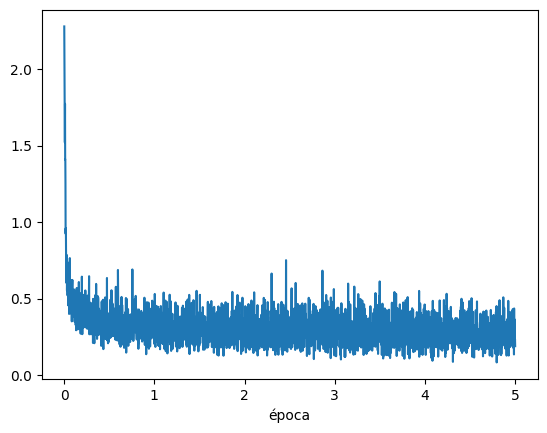

In [13]:
plt.plot(epochs, losses)
plt.xlabel('época')

In [14]:
n_epochs

5

Text(0.5, 0, 'época')

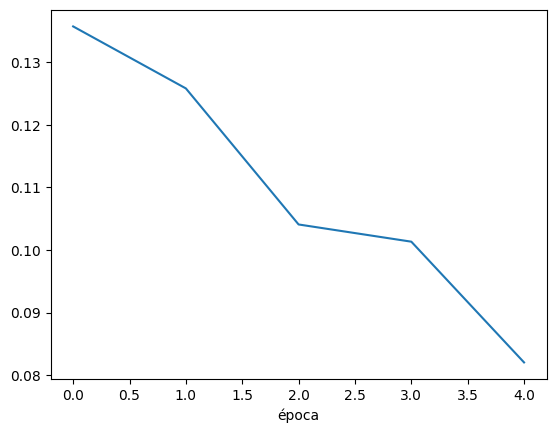

In [15]:
losses_for_plot = []
for epoch_idx in range(n_epochs):
    losses_for_plot.append(losses_epoch[(epoch_idx + 1) * n_batches_train - 1])

plt.plot(range(n_epochs), losses_for_plot)
plt.xlabel('época')


--- Iniciando Treinamento com Batch Size: 50 ---
Treinamento finalizado. Perda final: 0.2985

--- Iniciando Treinamento com Batch Size: 100 ---
Treinamento finalizado. Perda final: 0.1956

--- Iniciando Treinamento com Batch Size: 500 ---
Treinamento finalizado. Perda final: 0.2616


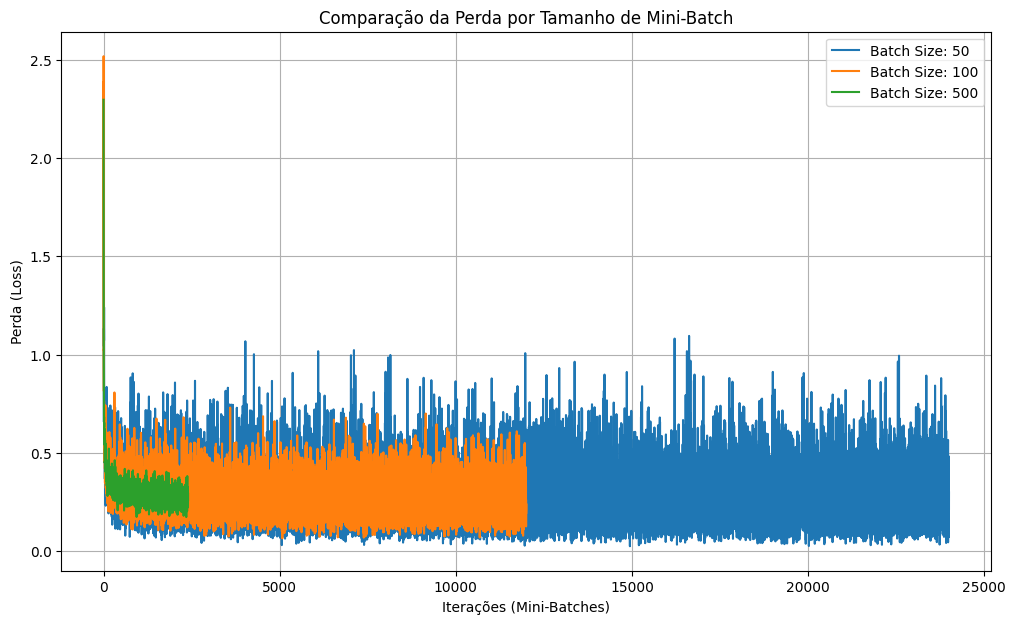

In [18]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

#Parâmetros de Teste
# Batch sizes a serem comparados.
batch_sizes_to_test = [50, 100, 500]
num_epochs_test = 20 # Reduzindo épocas para um teste mais rápido.
learningRate = 0.5 # Mantendo o learning rate ideal.

comparison_losses = {}
criterion = nn.CrossEntropyLoss()

# Define x_train_full and y_train_full from the existing dataset_train
x_train_full = dataset_train.data.float().div(255).view(-1, 28*28)
y_train_full = dataset_train.targets

for bs in batch_sizes_to_test:
    print(f"\n--- Iniciando Treinamento com Batch Size: {bs} ---")

    # 1. RECRIAR DATALOADER
    dataset_full = torch.utils.data.TensorDataset(x_train_full, y_train_full) # Usando o dataset completo da atividade
    dataloader_test = DataLoader(dataset_full, batch_size=bs, shuffle=True)

    # 2. RECRIAR MODELO E OTIMIZADOR PARA RTEINAR ELE DO ZERO
    model_test = torch.nn.Linear(28*28, 10)
    optimizer = optim.SGD(model_test.parameters(), lr=learningRate)

    loss_history = []

    for epoch in range(num_epochs_test):
        for data, target in dataloader_test:

            #Treinamento Básico
            inputs = data.view(-1, 28 * 28)

            optimizer.zero_grad()
            outputs = model_test(inputs)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            loss_history.append(loss.item()) # Salva a perda por minibatch

    comparison_losses[bs] = loss_history
    print(f"Treinamento finalizado. Perda final: {loss_history[-1]:.4f}")

#Plotagem da Comparação Final
plt.figure(figsize=(12, 7))
plt.title('Comparação da Perda por Tamanho de Mini-Batch')
plt.xlabel('Iterações (Mini-Batches)')
plt.ylabel('Perda (Loss)')

# Plota todas as curvas
for bs, losses in comparison_losses.items():
    plt.plot(losses, label=f'Batch Size: {bs}')

plt.legend()
plt.grid(True)
plt.show()


--- Iniciando Treinamento com Batch Size: 50 ---
Treinamento finalizado. Perda final: 0.0797

--- Iniciando Treinamento com Batch Size: 250 ---
Treinamento finalizado. Perda final: 0.2026

--- Iniciando Treinamento com Batch Size: 1000 ---
Treinamento finalizado. Perda final: 0.2018


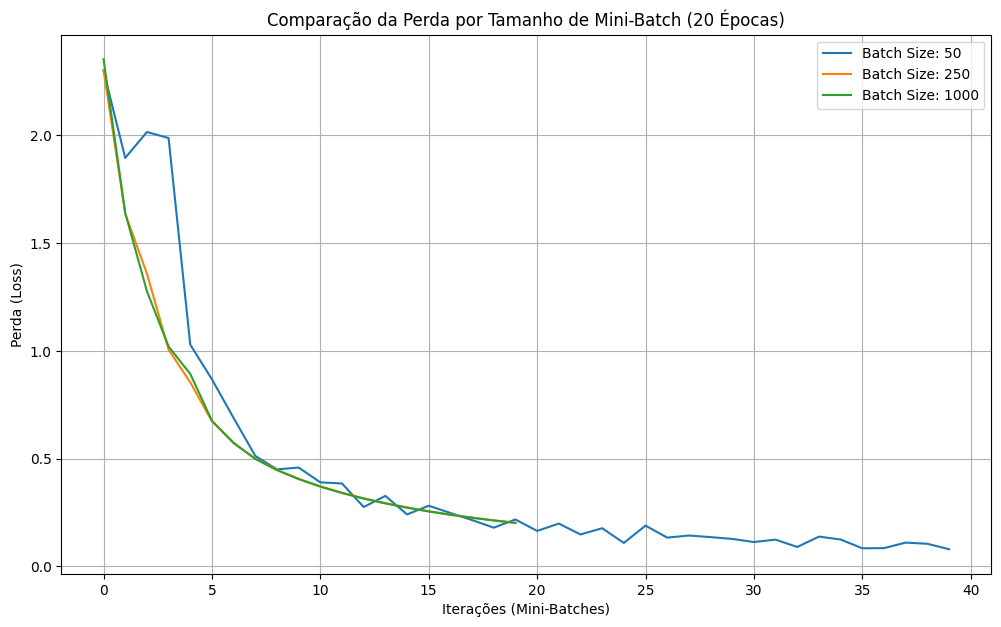

In [19]:
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data_utils
from torch.autograd import Variable
import matplotlib.pyplot as plt

# --- Parâmetros de Teste ---
batch_sizes_to_test = [50, 250, 1000] # Tamanhos do lote para testar: Pequeno, Médio, Grande
num_epochs_test = 20                   # Épocas suficientes para ver a convergência inicial
learningRate = 0.5                     # Mantendo a taxa de aprendizado ideal
comparison_losses = {}
criterion = nn.CrossEntropyLoss()

# --- Preparação do Dataset (Assumindo x_train e y_train já definidos) ---
dataset_full = data_utils.TensorDataset(x_train, y_train)

# --- Laço de Experimentos ---
for bs in batch_sizes_to_test:
    print(f"\n--- Iniciando Treinamento com Batch Size: {bs} ---")

    # 1. RECRIAR DATALOADER (Obrigatório: Randomiza os dados e define o tamanho do lote)
    dataloader_test = data_utils.DataLoader(dataset_full, batch_size=bs, shuffle=True)

    # 2. RECRIAR MODELO E OTIMIZADOR (Obrigatório: Reseta os pesos para o zero)
    model_test = torch.nn.Linear(28*28, 10) # 784 entradas, 10 saídas
    optimizer = optim.SGD(model_test.parameters(), lr=learningRate)

    loss_history = []

    # --- Laço de Treinamento e Registro de Perda ---
    for epoch in range(num_epochs_test):
        for data, target in dataloader_test:

            # Formatação da entrada (flatten 28x28 -> 784)
            inputs = Variable(data.view(-1, 28 * 28))

            # Forward, Loss, Backward, Step
            optimizer.zero_grad()
            outputs = model_test(inputs)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            loss_history.append(loss.item()) # Salva a perda APÓS CADA MINI-BATCH

    comparison_losses[bs] = loss_history
    print(f"Treinamento finalizado. Perda final: {loss_history[-1]:.4f}")

# --- Plotagem da Comparação Final ---
plt.figure(figsize=(12, 7))
plt.title('Comparação da Perda por Tamanho de Mini-Batch (20 Épocas)')
plt.xlabel('Iterações (Mini-Batches)')
plt.ylabel('Perda (Loss)')

# Plota as curvas
for bs, losses in comparison_losses.items():
    plt.plot(losses, label=f'Batch Size: {bs}')

plt.legend()
plt.grid(True)
plt.show()

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

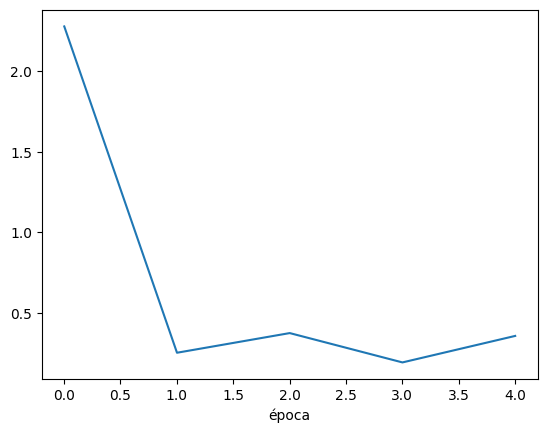

In [16]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?\
R: 100 porque é definido dessa forma no código base da atividade
2. Em uma época, quantos mini-batches existem?\
R: 10 mini-batches
3. Qual é a definição de época?\
R: 1 passagem completa por todo o conjunto de dados de treinamento porque essa é a definição adrão de uma époxca no treinamento de redes neurais

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 3/10
    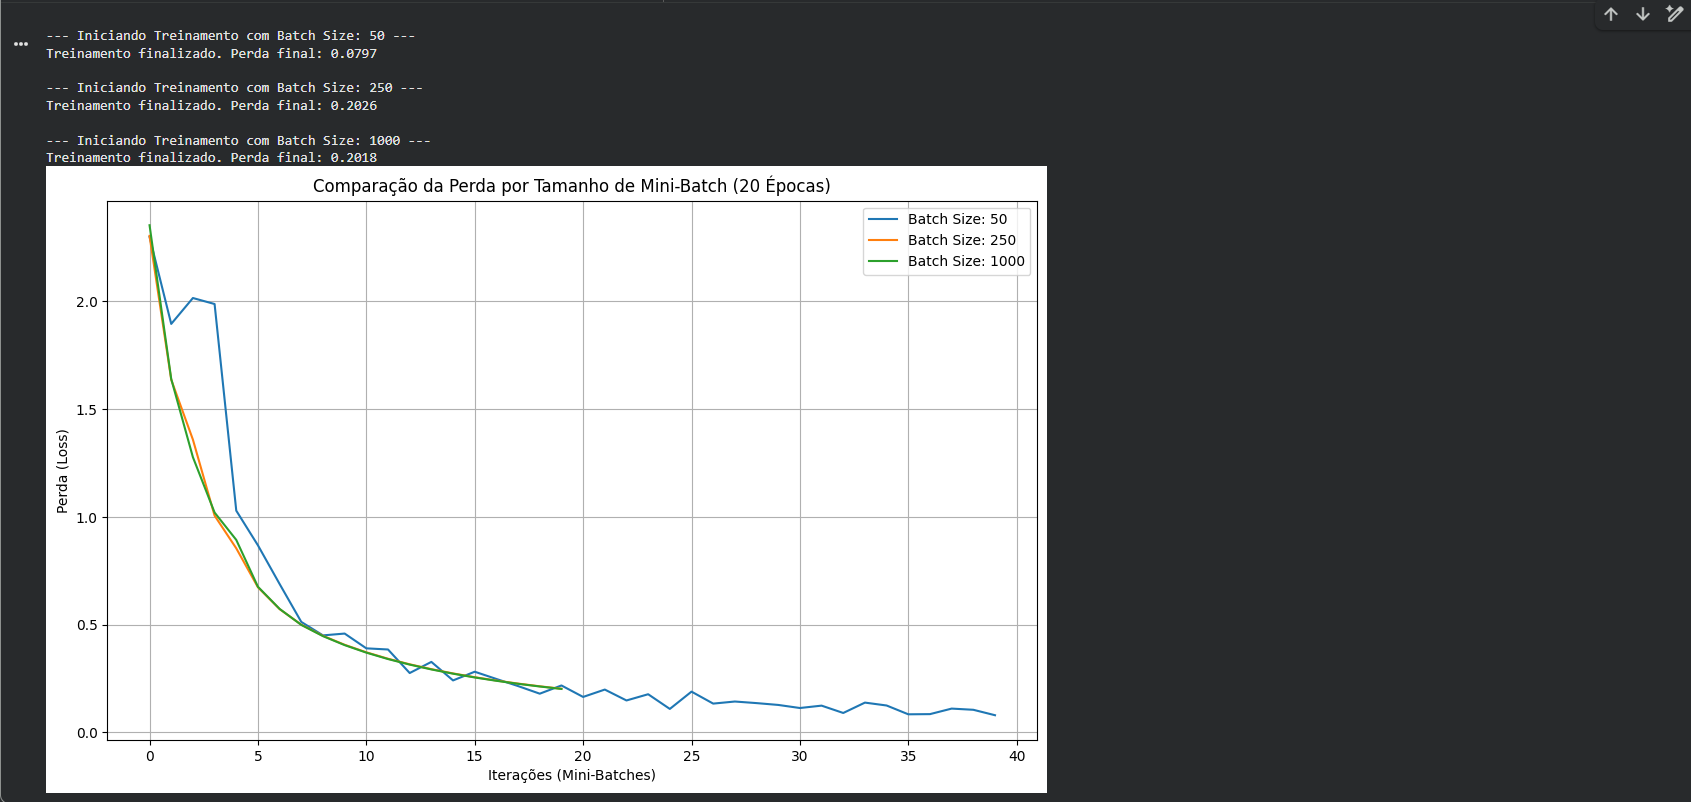
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.


## Conclusões sobre os experimentos deste notebook


uso de mini-batches melhora a eficiência computacional, permitindo que o modelo complete mais atualizações de parâmetros por unidade de tempo em comparação com o Gradiente Descendente completo, o que, na prática, leva à convergência da perda em menos épocas. e quanto a volatilidade do gradiente; devido à amostragem reduzida, o gradiente calculado é mais volátil (ou ruidoso). Essa alta variância resulta em uma trajetória mais instável e zigue-zagueante na curva de perda, especialmente ao usar batches muito pequenos.